I AM DOING THE IMPLEMENTAION OF VISION TRANSFORMER WHICH IS FROM THE PAPER "AN IMAGE IS WORTH 16X16 WORDS" AND VISION TRANSFORMER IS SIMILAR TO TRANSFORMER ARCHITECTURE IN NATURAL LANGUAGE PROCESSING TRANSFORMERS SO NOW FOR IMAGE CLASSIFICATION ONLY ENCODER PART IMPLEMENTATION IS ENOUGH 

IMPORTING NECESSING MODULES

In [2]:
import torch as t
import torchvision 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision import datasets
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from pathlib import Path
import os

GETTING THE DATASET (YOU CAN GET ANY DATASET I AM USING ANIMAL IMAGE CLASSIFICATION FROM KAGGLE)

In [12]:
path_for_animal_data=Path("animal_data")
#getting the folder structure
for dirpath,dirname,filename in os.walk(path_for_animal_data):
        print(f"The directory name is {dirpath.split("\\")[-1]} and has image files : {filename.__len__()} of the path : {dirpath}")

The directory name is animal_data and has image files : 0 of the path : animal_data
The directory name is Bear and has image files : 125 of the path : animal_data\Bear
The directory name is Bird and has image files : 137 of the path : animal_data\Bird
The directory name is Cat and has image files : 123 of the path : animal_data\Cat
The directory name is Cow and has image files : 131 of the path : animal_data\Cow
The directory name is Deer and has image files : 127 of the path : animal_data\Deer
The directory name is Dog and has image files : 122 of the path : animal_data\Dog
The directory name is Dolphin and has image files : 129 of the path : animal_data\Dolphin
The directory name is Elephant and has image files : 133 of the path : animal_data\Elephant
The directory name is Giraffe and has image files : 129 of the path : animal_data\Giraffe
The directory name is Horse and has image files : 130 of the path : animal_data\Horse
The directory name is Kangaroo and has image files : 126 of 

READING AN IMAGE AND SHOWING HOW DOES IT GOES AS PATCHES

[[[ 28 146 216]
  [ 29 147 217]
  [ 28 149 218]
  ...
  [ 44 185 254]
  [ 44 185 255]
  [ 42 183 254]]

 [[ 24 142 212]
  [ 27 145 215]
  [ 29 147 217]
  ...
  [ 46 187 255]
  [ 46 187 255]
  [ 46 187 255]]

 [[ 16 133 203]
  [ 21 139 209]
  [ 26 144 214]
  ...
  [ 46 188 254]
  [ 48 190 255]
  [ 48 190 255]]

 ...

 [[ 17 107 195]
  [ 13 103 189]
  [ 20 110 198]
  ...
  [ 14 102 199]
  [ 13 101 198]
  [ 13 101 198]]

 [[ 17 107 193]
  [ 14 105 188]
  [ 17 107 193]
  ...
  [ 13 101 198]
  [ 13 101 198]
  [ 13 101 198]]

 [[ 17 108 191]
  [ 15 106 189]
  [ 13 104 187]
  ...
  [ 14 102 199]
  [ 14 102 199]
  [ 14 102 199]]]
 The shape of the image is (224, 224, 3)
The image is : 


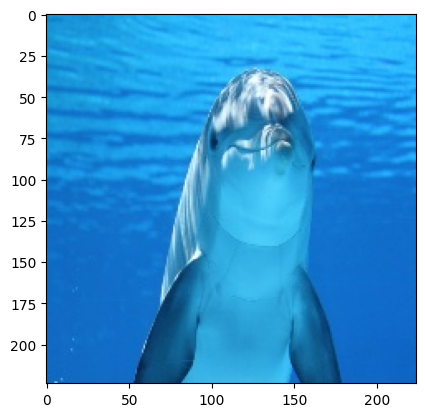

In [ ]:
numpy_data=mpimg.imread("animal_data/Dolphin/Dolphin_1_1.jpg")
print(numpy_data)
print(f" The shape of the image is {numpy_data.shape}")
print("The image is : ")
plt.imshow(numpy_data)


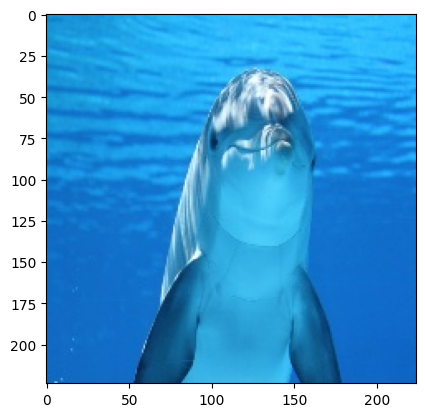

In [20]:
#you can also use PIL
from PIL import Image
plt.imshow(Image.open("animal_data/Dolphin/Dolphin_1_1.jpg"))

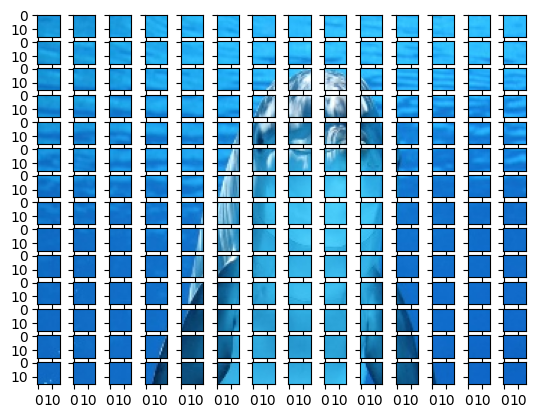

In [ ]:
#patchifying the image
image_len=224
patch_size=16
no_of_patches=image_len//patch_size
plt.axis(False)
fig,ax=plt.subplots(
        nrows=no_of_patches,
        ncols=no_of_patches,
        sharex=True,
        sharey=True,
        )
for num_i,i in enumerate(range(0,image_len,patch_size)):
        for num_j,j in enumerate(range(0,image_len,patch_size)):
                ax[num_i,num_j].imshow(numpy_data[i:i+patch_size,j:j+patch_size,:])
plt.show()


In [ ]:
#  Buildling the vision transformer model 
class convolution_vit(t.nn.Module):
        def __init__(self,patch_size):
                super().__init__()
                self.conv2d=t.nn.Conv2d(
                        in_channels=3,
                        out_channels=patch_size*patch_size*3, #color channels length
                        padding=0,
                        kernel_size=patch_size,
                        stride=patch_size
                )
                self.flattening=t.nn.Flatten(start_dim=-2,end_dim=-1)
                
        def forward(self,x):
                return self.flattening(self.conv2d(x))


In [ ]:
image_shape=(1,3,224,224)
tensor_in=t.rand(image_shape)
conv_vit=convolution_vit(patch_size=16)
conv_image=conv_vit(tensor_in)
print(f"conv_image_shape : {conv_image.shape}")


conv_image_shape : torch.Size([1, 768, 196])
16


In [59]:
"""
     according to vit we need the shape of (1,768,196) before it was (1,768,14,14) 
     add a class token which is a learnable embedding 
"""
#  Buildling the vision transformer model 
class convolution_vit_updated(t.nn.Module):
        def __init__(self,patch_size):
                super().__init__()
                self.conv2d=t.nn.Conv2d(
                        in_channels=3,
                        out_channels=patch_size*patch_size*3, #color channels length
                        padding=0,
                        kernel_size=patch_size,
                        stride=patch_size
                )
                self.flattening=t.nn.Flatten(start_dim=-2,end_dim=-1)
                self.class_token=t.nn.Parameter(t.randn(size=(1,1,768)),requires_grad=True)
        def forward(self,x):
                return t.cat((self.flattening(self.conv2d(x)).permute(0,2,1),self.class_token),dim=1)

In [60]:
image_shape=(1,3,224,224)
tensor_in=t.rand(image_shape)
conv_vit=convolution_vit_updated(patch_size=16)
conv_image=conv_vit(tensor_in)
print(f"conv_image_shape : {conv_image.shape}")
print(conv_vit.class_token.shape)


conv_image_shape : torch.Size([1, 197, 768])
torch.Size([1, 1, 768])


In [ ]:
#getting positional embeddingnow
"""
     according to vit we need the shape of (1,768,196) before it was (1,768,14,14) 
     add a class token which is a learnable embedding 
"""
#  Buildling the vision transformer model 
class convolution_vit_updated(t.nn.Module):
        def __init__(self,patch_size):
                super().__init__()
                self.conv2d=t.nn.Conv2d(
                        in_channels=3,
                        out_channels=patch_size*patch_size*3, #color channels length
                        padding=0,
                        kernel_size=patch_size,
                        stride=patch_size
                )
                self.flattening=t.nn.Flatten(start_dim=-2,end_dim=-1)
                self.class_token=t.nn.Parameter(t.randn(size=(1,1,768)),requires_grad=True)
                self.position_embed=t.nn.Parameter(t.randn(size=(1,14*14+1,768)))
        def forward(self,x):
                x=t.cat((self.flattening(self.conv2d(x)).permute(0,2,1),self.class_token),dim=1)
                final=self.position_embed+x
                return final

In [63]:
image_shape=(1,3,224,224)
tensor_in=t.rand(image_shape)
conv_vit=convolution_vit_updated(patch_size=16)
conv_image=conv_vit(tensor_in)
print(f"conv_image_shape : {conv_image.shape}")
#but actual position is added 

conv_image_shape : torch.Size([1, 197, 768])


In [ ]:
#now multi head attention is used from pytorch module 

class MSA(t.nn.Module):
        def __init__(self):
                super().__init__()
                self.layernorm=t.nn.LayerNorm(normalized_shape=768)
                self.multi_head_attention=t.nn.MultiheadAttention(
                        embed_dim=patch_size*patch_size*3,
                        batch_first=True,
                        dropout=0.1,
                        num_heads=12 # mainly choose a number which should divide embedding_dim
                )
        def forward(self,x):
                x_original=x
                x=self.layernorm(x)
                attn_output,_=self.multi_head_attention(
                        key=x,
                        query=x,
                        value=x,
                        need_weights=False
                )
                return attn_output+x_original # residual network

In [ ]:
image_shape=(1,3,224,224)
tensor_in=t.rand(image_shape)
conv_vit=convolution_vit_updated(patch_size=16)
conv_image=conv_vit(tensor_in)
msa=MSA()
msa_out=msa(conv_image)
print(msa_out.shape)

#the output does not change 

torch.Size([1, 197, 768])


In [69]:
class MLP(t.nn.Module):
        def __init__(self):
                super().__init__()
                self.layernorm=t.nn.LayerNorm(normalized_shape=768)
                self.layers=t.nn.Sequential(
                        t.nn.Linear(in_features=768,out_features=3072),
                        t.nn.GELU(),
                        t.nn.Dropout(p=0.1),
                        t.nn.Linear(in_features=3072,out_features=768),
                        t.nn.Dropout(p=0.1)
                )
        def forward(self,x):
                return self.layers(self.layernorm(x))+x # residual learning 

In [70]:
mlp=MLP()
mlp_out=mlp(msa_out)
print(mlp_out.shape)

torch.Size([1, 197, 768])


In [71]:
class Classifier(t.nn.Module):
        def __init__(self):
                super().__init__()
                self.classifier=t.nn.Sequential(
                        t.nn.LayerNorm(normalized_shape=768),
                        t.nn.Linear(in_features=768,out_features=13)
                )
        def forward(self,x):
                return self.classifier(x[:,0])

In [74]:
classifier=Classifier()
classifier_out=classifier(mlp_out)
print(classifier_out.shape)
print(classifier_out.argmax())

torch.Size([1, 13])
tensor(10)


In [ ]:
#so thus we get the labels you can try to use this model for training but using pytorch direct models will give better results